# Módulo 07 - Tarefa 02



#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).




### 1.1: Carregando a base de dados:

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


# Carregando DataFrame com os Dummies

df = pd.read_csv('df_sklearn.csv')

In [145]:
# Conferindo DataFrame

df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_Y,posse_de_imovel_N,posse_de_imovel_Y
0,0,58.832877,3.106849,1,0,0,0,2.0,False,False,True,False,True,False,True
1,0,52.356164,8.358904,1,0,1,1,1.0,False,True,False,True,False,False,True
2,0,52.356164,8.358904,1,0,1,1,1.0,False,True,False,True,False,False,True
3,0,46.224658,2.106849,1,1,1,1,2.0,False,False,True,False,True,False,True
4,0,29.230137,3.021918,1,0,0,0,2.0,False,True,False,False,True,True,False


In [146]:
df.shape

(16650, 15)

In [147]:
df.columns

Index(['qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau', 'sexo_F', 'sexo_M',
       'posse_de_veiculo_N', 'posse_de_veiculo_Y', 'posse_de_imovel_N',
       'posse_de_imovel_Y'],
      dtype='object')

In [148]:
# Verificando pendências

df.dtypes

qtd_filhos                 int64
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
sexo_F                      bool
sexo_M                      bool
posse_de_veiculo_N          bool
posse_de_veiculo_Y          bool
posse_de_imovel_N           bool
posse_de_imovel_Y           bool
dtype: object

In [149]:
df.isnull().sum()

qtd_filhos               0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
sexo_F                   0
sexo_M                   0
posse_de_veiculo_N       0
posse_de_veiculo_Y       0
posse_de_imovel_N        0
posse_de_imovel_Y        0
dtype: int64

#### 1.1.1 Avaliação da Base de Dados: ✅✅✅
Base de Dados elegivel para ser usada com o Scikit-learn. Nenhum missing ou variavel não numérica/booleana.






### 1.2: Separando a base de dados:

In [150]:
# Definindo y como coluna alvo
y = df.mau

# Definindo X somente com as explicativas
X = df.drop('mau', axis = 1)

In [151]:
# Aplicando train_test_split importado do Scikit-learn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [152]:
X.shape

(16650, 14)

In [153]:
X_train.shape

(11655, 14)

In [154]:
X_test.shape

(4995, 14)

In [155]:
X.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_Y,posse_de_imovel_N,posse_de_imovel_Y
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,False,True,False,True
1,0,52.356164,8.358904,1,0,1,1,1.0,True,False,True,False,False,True
2,0,52.356164,8.358904,1,0,1,1,1.0,True,False,True,False,False,True
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,False,True,False,True
4,0,29.230137,3.021918,1,0,0,0,2.0,True,False,False,True,True,False


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [156]:
# Definindo o Classifier com X e y

clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(random_state=100)

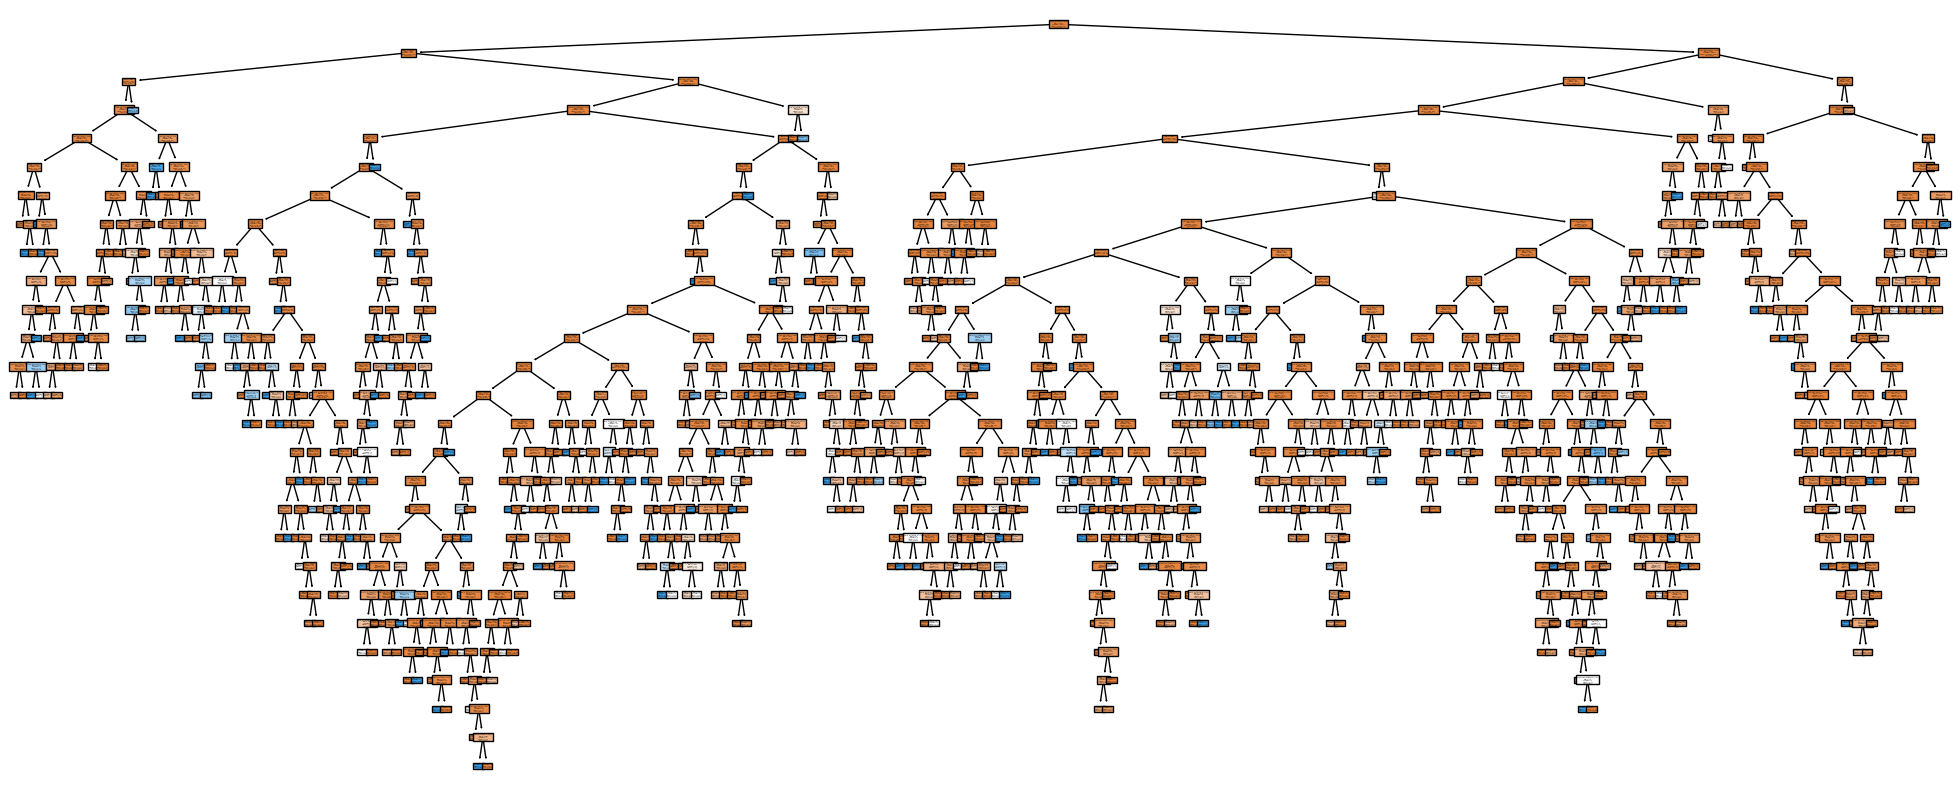

In [157]:
# Visualizando a Arvore pré-treino

plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
# Em que ordem eu devo colocar os class_names?
          class_names=['Mau', 'Bom'],
          feature_names=list(X.columns));
# Como eu posso dar mais zoom na imagem?

In [158]:
# Treinando o modelo na Base de Dados para treinamento

# Atribuindo novo valor a variavel de classificação 
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)
clf

DecisionTreeClassifier(random_state=100)

In [159]:
# Criando o Y-chapéu 

predict = clf.predict(X_test)
predict

array([False, False, False, ..., False, False, False])

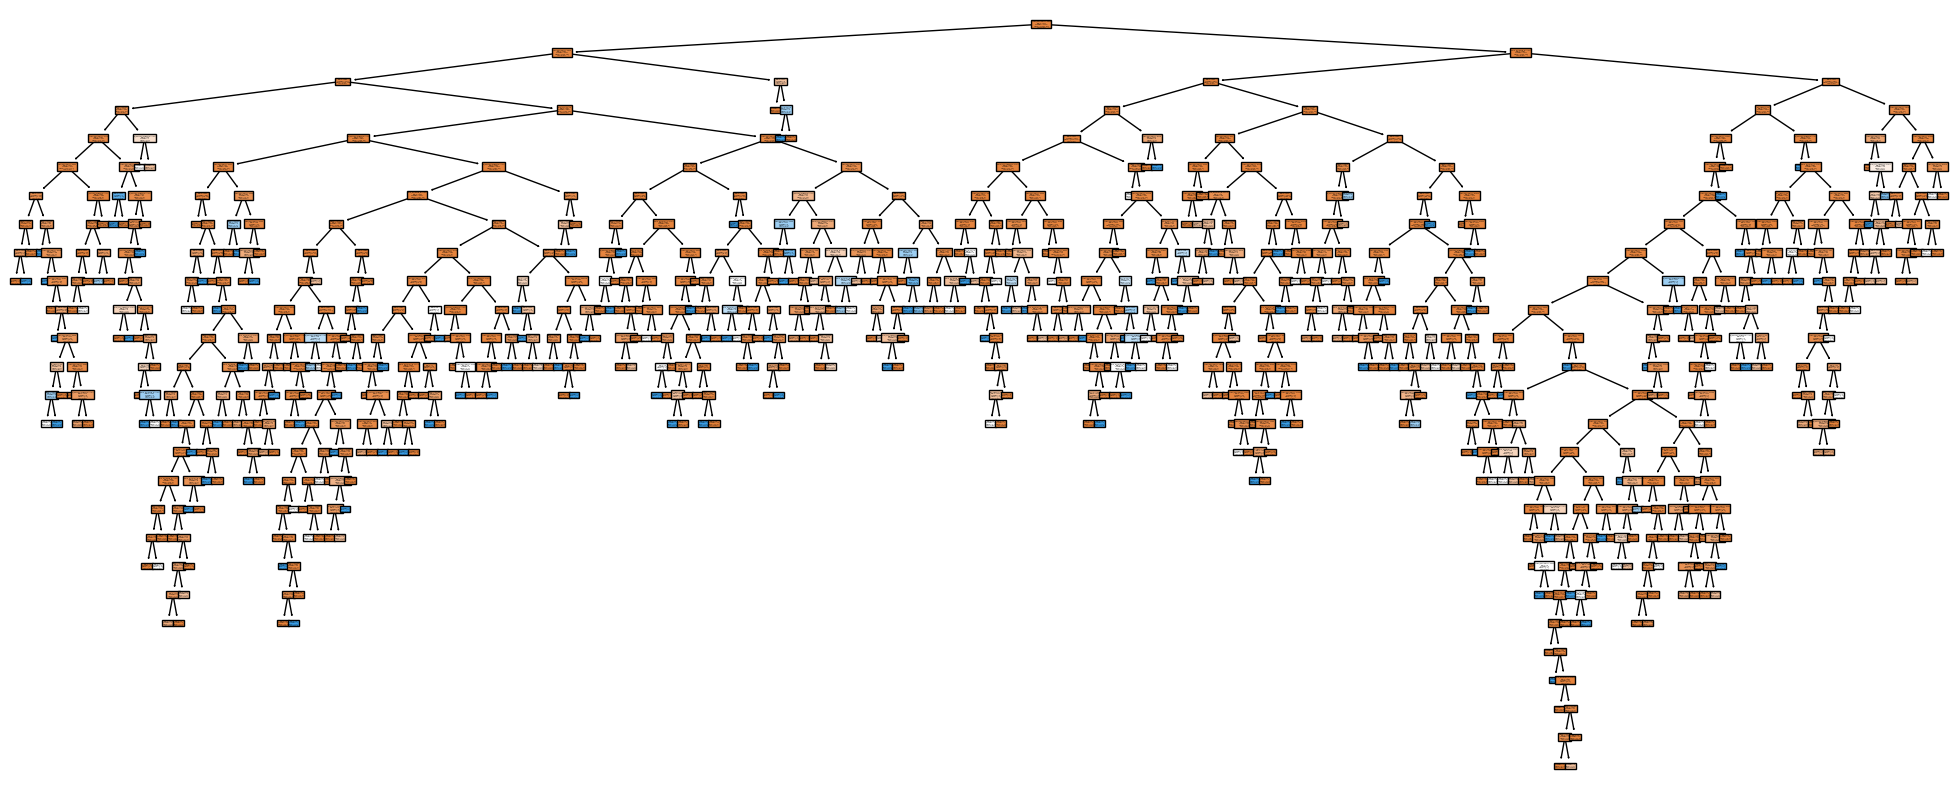

In [160]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
# Em que ordem eu devo colocar os class_names?
          class_names=['Mau', 'Bom'],
          feature_names=list(X_train.columns));
# Como eu posso dar mais zoom na imagem?

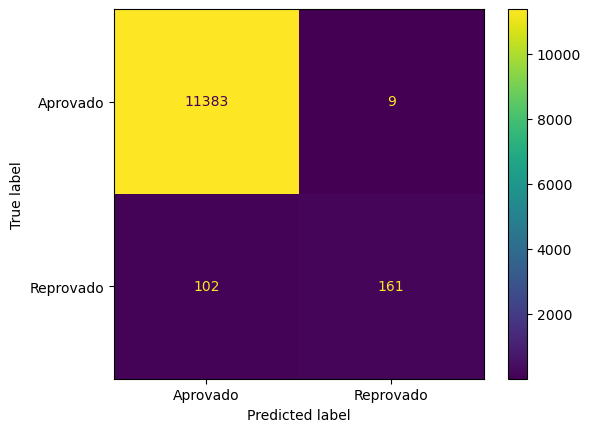

In [161]:
# Criando a visualização da Matrix de confusão do X Treino

cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Reprovado'])

MatrizDeConfusao.plot()

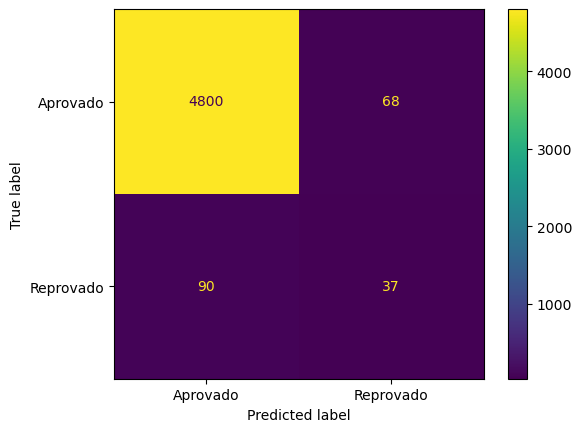

In [162]:
# Criando a visualização da Matrix de confusão do X Teste

cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Reprovado'])

MatrizDeConfusao.plot()

In [163]:
# Aplicando o accuracy_score do sklearn ao modelo

acc0 = accuracy_score(y_test, predict)
acc0

0.9683683683683684

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [164]:
#Treinando nova árvore

clf2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf2 = clf2.fit(X_train,y_train)


In [165]:
predict2 = clf2.predict(X_test)
accuracy_score(y_test, predict)

0.9683683683683684

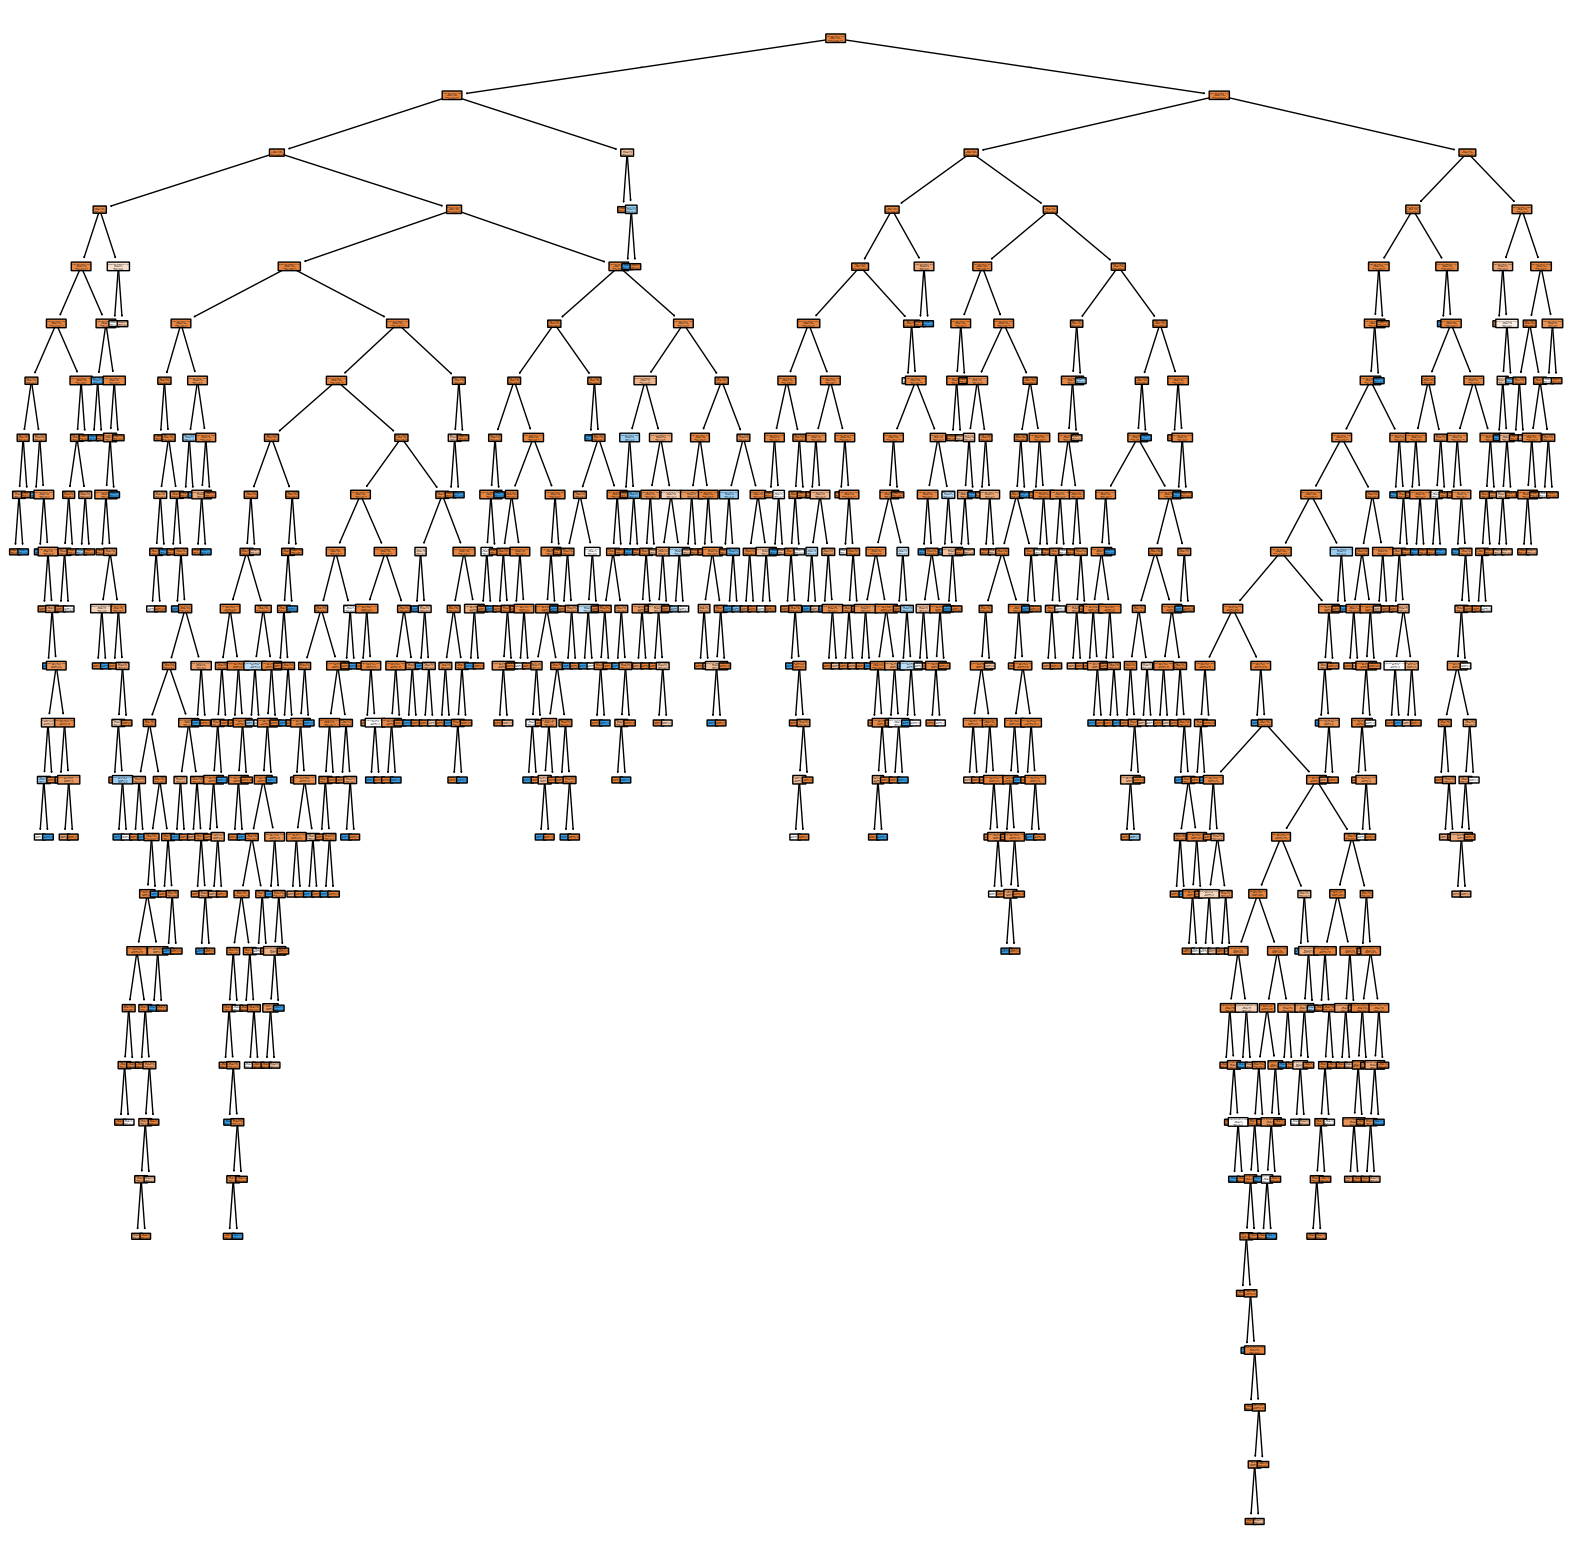

In [166]:
# Visualizando nova arvore

plt.figure(figsize=[20,20])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Mau', 'Bom'],
         feature_names=list(X_train.columns));

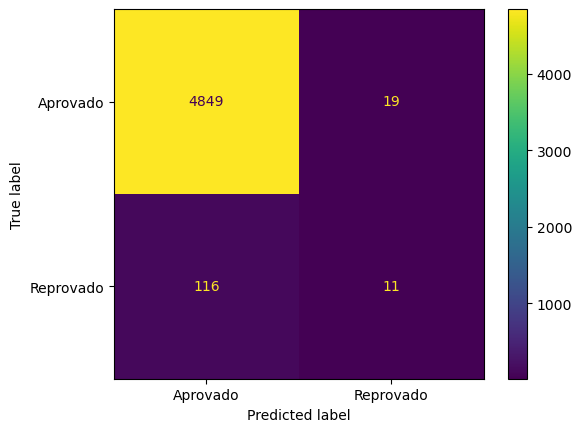

In [167]:
# Matriz de Confusão

cm2 = confusion_matrix(y_test, predict2)

# Visualização

MatrizDeConfusao2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Aprovado', 'Reprovado'])

MatrizDeConfusao2.plot()

In [168]:
# Acurácia

acc = accuracy_score(y_test, predict2)

print(f"Acurácia: {acc:.4f}")

Acurácia: 0.9730


In [169]:
# Distribuição das predições

dist_pred = pd.Series(predict2).value_counts(normalize=True)

print("\nDistribuição das predições (%):")

print(dist_pred * 100)


Distribuição das predições (%):
False    99.399399
True      0.600601
Name: proportion, dtype: float64


In [170]:
# Proporção de maus pagadores

prop_maus = dist_pred.get(True, 0) * 100

print(f"\nProporção de proponentes classificados como 'maus' (True): {prop_maus:.2f}%")


Proporção de proponentes classificados como 'maus' (True): 0.60%


In [171]:
# Verificando acurácia se todos fossem marcados como 'bons'

acc_todos_bons = (y_test == False).mean()

print(f"Acurácia se todos fossem classificados como 'bons': {acc_todos_bons:.4f}")


Acurácia se todos fossem classificados como 'bons': 0.9746


In [172]:
# Bonus:
# Aqui eu gostaria de colocar uma comparação das acurácias, como eu poderia fazer?

In [183]:
print("Acurácia do modelo Treinado:")
print("\n Acurácia na Base de Treinamento:")
print(acc0)
print("\n Acurácia na Base de Teste:")
print(acc)
print("\n")
print("Acurácia no modelo Arbitrário:")
print("\n Acurácia marcando todos como 'bons':")
print(acc_todos_bons)
media_acc = (acc0+acc)/2
print(f"\n Diferença da Acurácia entre os modelos: {acc_todos_bons-media_acc}")

Acurácia do modelo Treinado:

 Acurácia na Base de Treinamento:
0.9683683683683684

 Acurácia na Base de Teste:
0.972972972972973


Acurácia no modelo Arbitrário:

 Acurácia marcando todos como 'bons':
0.9745745745745745

 Diferença da Acurácia entre os modelos: 0.003903903903903827


In [177]:
# A acurácia no Treinamento não deveria ser maior do que na base de Testes?
# Como vejo se a diferença entre a Acurácia do modelo treinado e do marcando todos 'bons' é significativa?

## Conclusão

A base de proponentes 'maus' é muito pequena, representando apenas 0.60% da nossa base de dados. 
O método que se provou menor taxa de erro nessa base, por uma pequenissima margem, foi o em que marcamos todos os clientes como 'bons'.